# 0.0. IMPORTS

In [1]:
import pandas                      as pd
import seaborn                     as sns
import matplotlib.pyplot           as plt 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools     import adfuller
from minio                         import Minio

## 0.1. Loanding Data

In [2]:
# Chave de acesso ao datalake
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

# Carregando os dados do datalake
client.fget_object("processing","dataset.parquet","/tmp/dataset.parquet")
df = pd.read_parquet('/tmp/dataset.parquet')
df = df[['Date','Close']].copy()
df.head()

,Date,Close
0,2021-10-20,28.500000
1,2021-10-21,27.450001
2,2021-10-22,27.180000
3,2021-10-25,29.040001
4,2021-10-26,28.760000


# 1.0. DATA DESCRIPTION

## 1.1. Estatística descritiva

In [3]:
df['Close'].describe()

count    505.000000
mean      28.309426
std        3.718267
min       18.670000
25%       26.360001
50%       28.450001
75%       31.090000
max       37.230000
Name: Close, dtype: float64

## 1.2. Time Series

<AxesSubplot: >

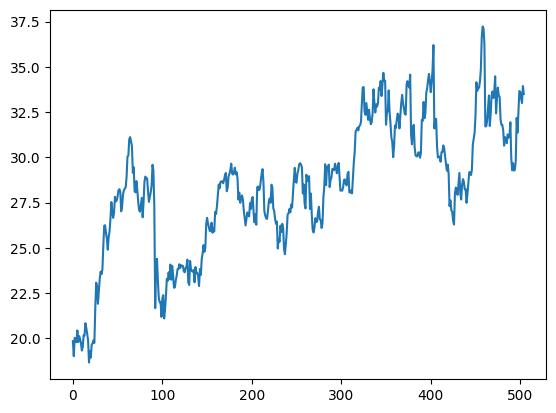

In [4]:
df['Close'].plot()

## 1.3. Visualizando a sazonalidade

In [3]:
# Separando dia, mês e ano.
df['Date'] = pd.to_datetime(df['Date'])
df['Dia']  = df['Date'].dt.day
df['Mes']  = df['Date'].dt.month
df['DiaDaSemana'] = df['Date'].dt.dayofweek

### 1.3.1. Dia

<AxesSubplot: xlabel='Dia', ylabel='Close'>

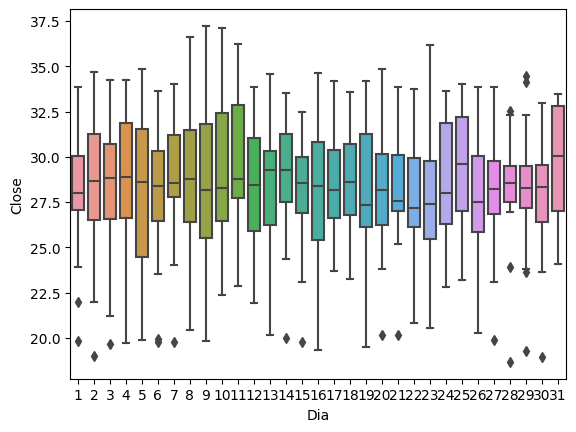

In [6]:
sns.boxplot(data=df, x='Dia', y='Close')

### 1.3.2. Mês

<AxesSubplot: xlabel='Mes', ylabel='Close'>

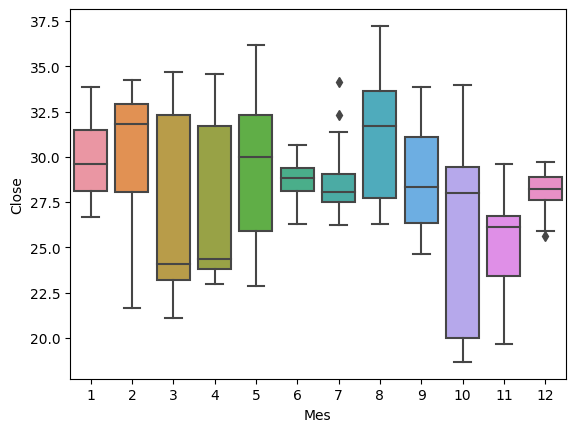

In [7]:
sns.boxplot(data=df, x='Mes', y='Close')

### 1.3.3. Dias da semana

<AxesSubplot: xlabel='DiaDaSemana', ylabel='Close'>

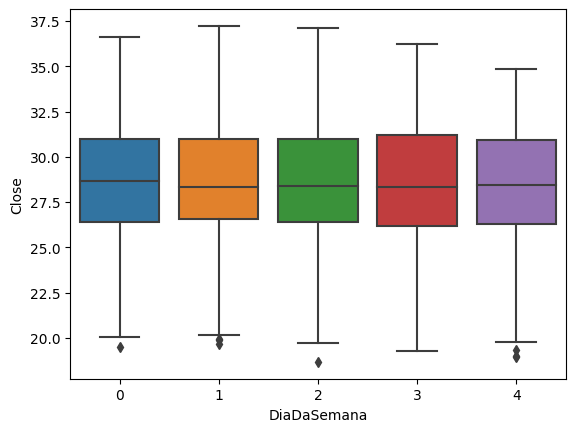

In [8]:
sns.boxplot(data=df, x='DiaDaSemana', y='Close')

## 1.4. Distribuição da series

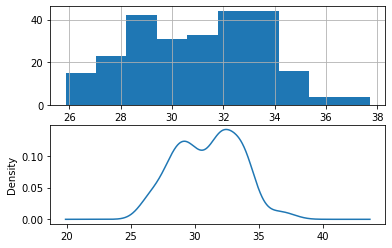

In [5]:
series = df['Close']
plt.figure(1)
plt.subplot(211)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

## 1.5. Visualizando a autocorrelação

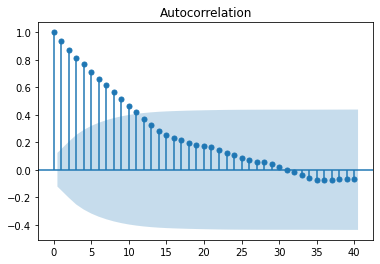

In [6]:
plot_acf(series, lags=40)
plt.show()

## 1.6. Checando a estacionalidade

In [7]:
resultado= adfuller(series.values)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values: ')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))


ADF teste: -2.885093

p-value: 0.047109

Critical Values: 
	1%: -3.456
	5%: -2.873
	10%: -2.573
